In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage as sk
import os
import cv2
import skimage.io
import sklearn

In [2]:
TEST = "Data/TEST/"
TRAIN = "Data/TRAIN/"

CSVs = []
IMGs = []
for i in os.listdir(TEST):
    if "csv" in i:
        CSVs.append(TEST + i)
    if "jpg" in i or "png" in i:
        IMGs.append(TEST + i)

CSVs = sorted(CSVs)
IMGs = sorted(IMGs)

print(CSVs, IMGs)

tables = [pd.read_csv(c, header=None) for c in CSVs]
images = [plt.imread(i) for i in IMGs]

['Data/TEST/ex01.csv', 'Data/TEST/ex02.csv', 'Data/TEST/ex03.csv', 'Data/TEST/ex04.csv', 'Data/TEST/ex05.csv'] ['Data/TEST/ex01.jpg', 'Data/TEST/ex02.jpg', 'Data/TEST/ex03.jpg', 'Data/TEST/ex04.jpg', 'Data/TEST/ex05.jpg']


Original Dimensions :  (1536, 2039, 3)
Resized Dimensions :  (230, 305, 3)


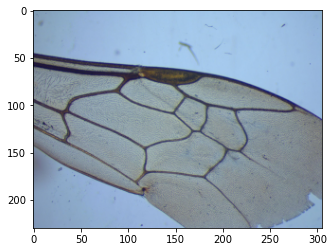

In [3]:
import cv2
 
input_image = images[3]
img = input_image.copy()
 
print('Original Dimensions : ', img.shape)
 
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
reduced = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',reduced.shape)
 
plt.imshow(reduced)

Original Dimensions :  (230, 305, 3)
Resized Dimensions :  (1536, 2039, 3)


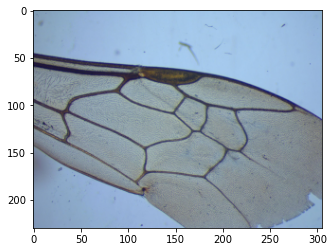

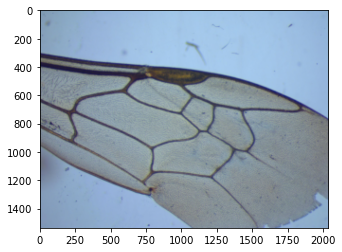

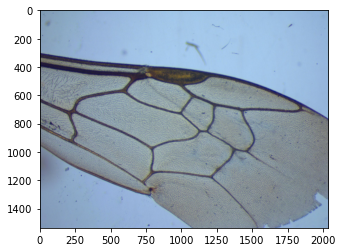

In [4]:
imz = reduced.copy()
img = reduced.copy()
 
print('Original Dimensions : ', img.shape)
 
scale_percent = 15 # percent of original size
width = int(input_image.shape[1])
height = int(input_image.shape[0])
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ', resized.shape)

plt.imshow(imz)
plt.show() 
plt.imshow(resized)
plt.show()
plt.imshow(input_image)
plt.show()

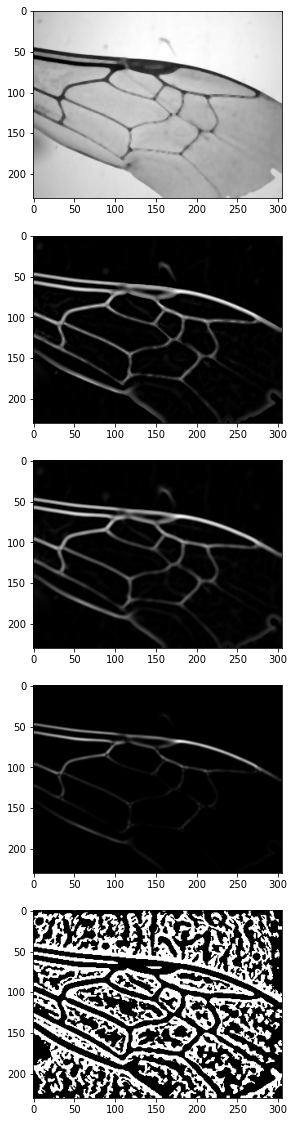

In [5]:
from skimage.filters import meijering, sato, frangi, hessian, gaussian, median
from skimage.color import rgb2gray
kwargs = {'sigmas': range(1, 5, 2), 'mode': 'reflect'}
img = rgb2gray(imz)
img_blurred = gaussian(img, sigma=4)
img_denoised = median(img, selem=np.ones((5,5)))
res = img_denoised
image = res
meij = meijering(image, **kwargs)
saato = sato(image, **kwargs)
frang = frangi(image, **kwargs)
hess = hessian(image, **kwargs)
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(15,20))
ax0.imshow(image, cmap='gray')
ax1.imshow(meij, cmap='gray')
ax2.imshow(saato, cmap='gray')
ax3.imshow(frang, cmap='gray')
ax4.imshow(hess, cmap='gray')

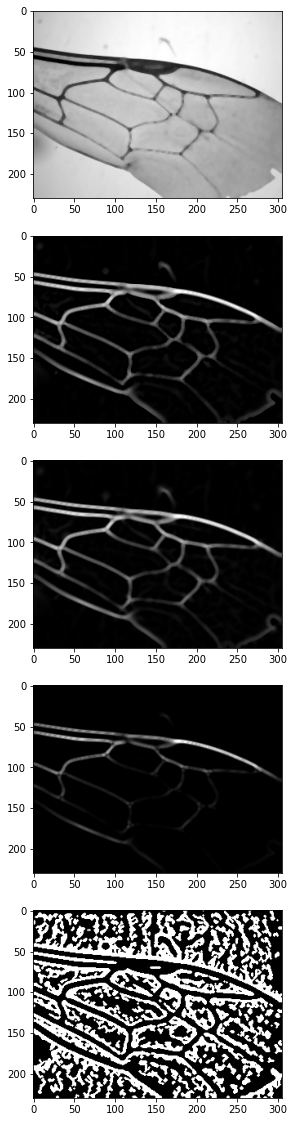

In [6]:
tmeij = meij.copy()
tsaato = saato.copy()
tfrang = frang.copy()
thess = hess.copy()

def remove_small(img):
    footprint = sk.morphology.disk(1)
    res = sk.morphology.white_tophat(img, footprint)
    arr = res > 0
    cleaned = sk.morphology.remove_small_objects(arr, min_size=2)
    return img - res
tmeij = remove_small(meij)
tsaato = remove_small(saato)
tfrang = remove_small(frang)
thess = remove_small(hess)
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(15,20))
ax0.imshow(image, cmap='gray')
ax1.imshow(tmeij, cmap='gray')
ax2.imshow(tsaato, cmap='gray')
ax3.imshow(tfrang, cmap='gray')
ax4.imshow(thess, cmap='gray')

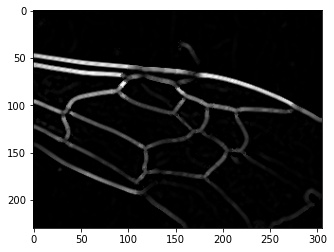

In [68]:
from skimage.morphology import disk, white_tophat, area_closing, skeletonize

image = tmeij.copy()

footprint = disk(3)
res = white_tophat(image, footprint)
res = area_closing(res, area_threshold=64, connectivity=50)
plt.imshow(res, cmap="gray")

In [69]:
thres = np.mean(res) / 2
res[res > thres] = 1
res[res <= thres] = 0

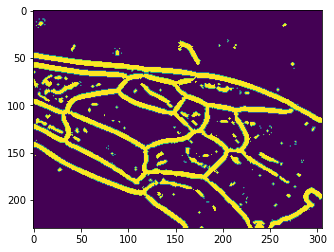

In [70]:
plt.imshow(res)

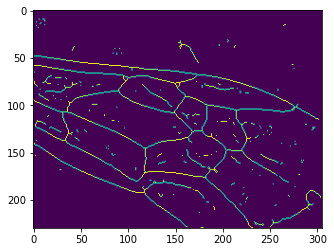

In [71]:
skel = skeletonize(res)
plt.imshow(skel)